Hypothesis 2:
- H0: Air quality of borough of interest 1 = Air quality of borough of interest 2
- H1: Air quality of borough of interest 1 > Air quality of borough of interest 2

Areas of interest are defined as:
Boroughs with highest and lowest Greenspace - Havering and City of London

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import data_cleaning as dc
import api

from scipy import stats
from scipy.stats import norm


sns.set_style('whitegrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
#Import DF
df = dc.full_clean()

In [3]:
#Call API for each City
Hav = api.get_place_aqi(df, 'Havering',100)
Hav = np.asarray(Hav)
len(Hav)

198

In [4]:
Col = api.get_place_aqi(df, 'City of London', 100)
Col = np.asarray(Col)
len(Col)

198

In [5]:
x1 = Hav
x2 = Col

In [6]:
# Find mean, variance and standard deviation of each sample
def sample_mu_std_var(sample):
    mean = np.mean(sample)
    std = np.std(sample)
    var = np.var(sample)
    return mean, std, var

In [7]:
msv = sample_mu_std_var(x1), sample_mu_std_var(x2)
msv

((82.63636363636364, 6.9091573627851455, 47.73645546372819),
 (71.42929292929293, 7.9246801869670165, 62.80055606570758))

In [8]:
#Assign averages to variables
x1m = msv[0][0]
x1s = msv[0][1]
x1v = msv[0][2]
x2m = msv[1][0]
x2s = msv[1][1]
x2v = msv[1][2]

In [12]:
#Generate a normal distribution for each sample
x1n = norm(x1m, x1s)
x2n = norm(x2m, x2s)

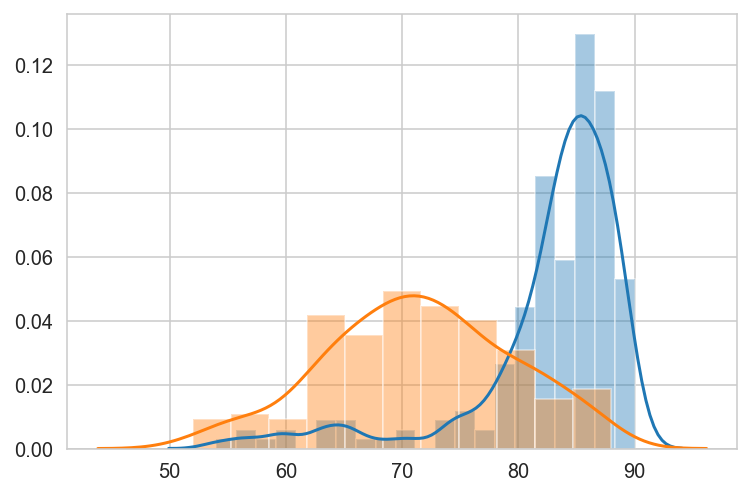

In [13]:
#Visually inspecting the distributions for differences in mean and standard deviation
sns.distplot(x1), sns.distplot(x2);

In [14]:
#Finding the critical T Value and P Value
def twosample_tstatistic(sample1, sample2):
    stat = stats.ttest_ind(sample1, sample2, equal_var = False)
    return stat

two_t = twosample_tstatistic(x1, x2)
t_stat = two_t.statistic
p_val = two_t.pvalue
print('T-Stat: ',t_stat, ' P-Val: ',p_val)

T-Stat:  14.96137007917176  P-Val:  2.9667032272376244e-40


In [22]:
def Cohen_d(group1, group2):
    #Calculate Difference
    diff = group1.mean() - group2.mean()

    n1, n2 = len(group1), len(group2)
    var1 = group1.var()
    var2 = group2.var()

    # Calculate the pooled threshold as shown earlier
    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    
    # Calculate Cohen's d statistic
    d = diff / np.sqrt(pooled_var)
    
    return d

In [23]:
Cohen_d(x1, x2)

1.507485870987777

In [20]:
def evaluate_PDF(rv, x=4):
    '''Input: a random variable object, standard deviation
    output : x and y values for the normal distribution
    '''
    
    # Identify the mean and standard deviation of random variable 
    mean = rv.mean()
    std = rv.std()

    # Use numpy to calculate evenly spaced numbers over the specified interval (4 sd) and generate 100 samples.
    xs = np.linspace(mean - x*std, mean + x*std, 100)
    
    # Calculate the peak of normal distribution i.e. probability density. 
    ys = rv.pdf(xs)

    return xs, ys # Return calculated values

Text(0.5, 0, 'PDF of AQI in Havering and City of London')

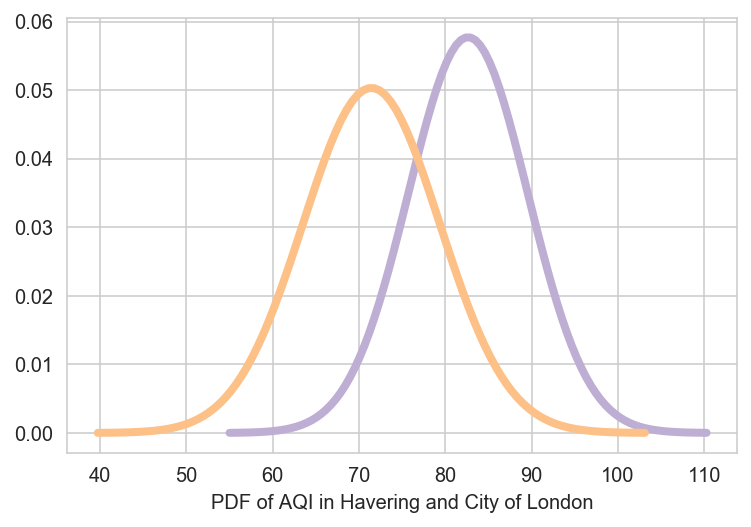

In [25]:
#Plotting PDF 

#Havering
xs, ys = evaluate_PDF(x1n)
plt.plot(xs, ys, label='Havering', linewidth=4, color='#beaed4') 

#City of London
xs, ys = evaluate_PDF(x2n)
plt.plot(xs, ys, label='City of London', linewidth=4, color='#fdc086')

plt.xlabel('PDF of AQI in Havering and City of London')

As our P-Value is not less than our alpha value, we are acceting the Null Hypothesis, H0, and concluding that there is no significant difference between samples. Our Cohen's D value shows a high effect size, and our visualisations show there is a large amount of overlap between samples.